<a href="https://colab.research.google.com/github/nimish1402/Abusive-Language-Detection/blob/main/hate_speech_and_offensive_language_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string

import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('all')

from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator

from collections import Counter

from matplotlib import ticker
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report


sns.set(style="darkgrid")
import pandas as pd
import numpy as np
import re
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

import nltk
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[n

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d thedevastator/hate-speech-and-offensive-language-detection

Dataset URL: https://www.kaggle.com/datasets/thedevastator/hate-speech-and-offensive-language-detection
License(s): CC0-1.0
100% 963k/963k [00:00<00:00, 1.93MB/s]
100% 963k/963k [00:00<00:00, 1.93MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/hate-speech-and-offensive-language-detection.zip")
zip_ref.extractall('/content')
zip_ref.close()

# Data Exploration

In [ ]:
data=pd.read_csv('/content/train.csv')
data.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;


In [ ]:
data['class'].value_counts()

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

Here, 0 - hate speech 1 - offensive language 2 - neither

In [ ]:
data.describe()

,count,hate_speech_count,offensive_language_count,neither_count,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.883060,0.631851,1.399459,1.113299,0.462089
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000
75%,3.000000,0.000000,3.000000,0.000000,1.000000
max,9.000000,7.000000,9.000000,9.000000,2.000000


In [ ]:
data.isna().sum()

count                       0
hate_speech_count           0
offensive_language_count    0
neither_count               0
class                       0
tweet                       0
dtype: int64

In [ ]:
data.duplicated().sum()

0

There are no duplicate values in the dataset

Therefore there is no requirement for data cleaning

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   count                     24783 non-null  int64 
 1   hate_speech_count         24783 non-null  int64 
 2   offensive_language_count  24783 non-null  int64 
 3   neither_count             24783 non-null  int64 
 4   class                     24783 non-null  int64 
 5   tweet                     24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.1+ MB


In [ ]:
# check random tweet
data['tweet'][100]

'"@ClicquotSuave: LMAOOOOOOOOOOO this nigga @Krillz_Nuh_Care http://t.co/AAnpSUjmYI" &lt;bitch want likes for some depressing shit..foh'

In [ ]:
data.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;


Data Visualization - Distribution of tweet counts per classification category

There is a column called "class" but it's not clear what it represents.

Let's see what "class" represents.

In [ ]:
(data
     .groupby("class")
     .agg(
        hate_speech_count=("hate_speech_count", "mean"),
        offensive_language_count=("offensive_language_count", "mean"),
        neither_count=("neither_count", "mean"),
     )
     .round(1)
)

,hate_speech_count,offensive_language_count,neither_count
class,,,
0,2.3,0.8,0.1
1,0.2,3.0,0.1
2,0.1,0.3,2.8


From this, we can see that

*  class 0 = hate tweet
*  class 1 = offensive tweet
*  class 2 = neutral tweet

<Axes: xlabel='class', ylabel='Count'>

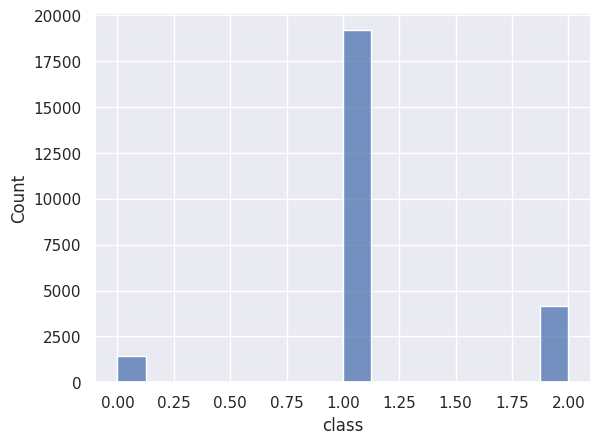

In [ ]:
sns.histplot(data['class'])

<Axes: xlabel='class', ylabel='count'>

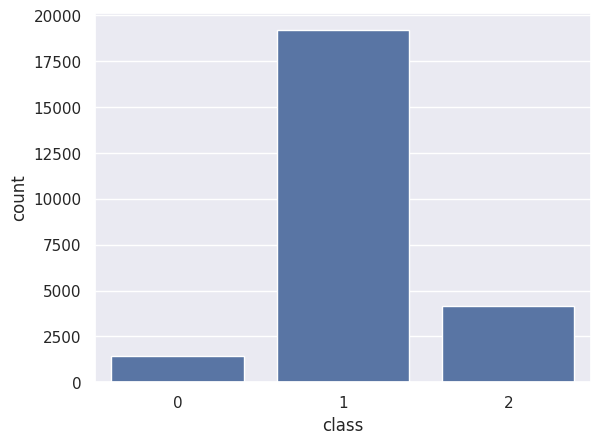

In [ ]:
sns.countplot(x='class', data= data)

In [ ]:
df = data

# Data Processing

1) remove html entity 2) change user tags (@xxx -> user) 3) remove urls 4) remove unnecessary symbol ('', !, ", ') -> cause a lot of noise in the dataset 5) remove stopwords

To remove the links from text attribute, we have defined the following function with the help of 'Regex'.

In [ ]:
# URL Removal
data["tweet"] = data["tweet"].apply(lambda x:re.sub(r'https?://\S+', '', str(x)))
data["tweet"]

0              !!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1                                                                     !!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2                                  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3                                                                                            !!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4                 !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;
                                                                                ...                                                                        
24778    you's a muthaf***in lie &#8220;@LifeAsKing: @20_Pearls 

In [ ]:
# Lowercase removal
data['tweet'] = data['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['tweet']

0              !!! rt @mayasolovely: as a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1                                                                     !!!!! rt @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2                                  !!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby4life: you ever fuck a bitch and she start to cry? you be confused as shit
3                                                                                            !!!!!!!!! rt @c_g_anderson: @viva_based she look like a tranny
4                 !!!!!!!!!!!!! rt @shenikaroberts: the shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;
                                                                                ...                                                                        
24778    you's a muthaf***in lie &#8220;@lifeasking: @20_pearls 

In [ ]:
# Punctuation Removal

data['tweet'] = data['tweet'].str.replace('[^\w\s]','')
data['tweet']

0              !!! rt @mayasolovely: as a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1                                                                     !!!!! rt @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2                                  !!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby4life: you ever fuck a bitch and she start to cry? you be confused as shit
3                                                                                            !!!!!!!!! rt @c_g_anderson: @viva_based she look like a tranny
4                 !!!!!!!!!!!!! rt @shenikaroberts: the shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;
                                                                                ...                                                                        
24778    you's a muthaf***in lie &#8220;@lifeasking: @20_pearls 

In [ ]:
# Function to remove usernames/handles

data["tweet"] = data["tweet"].apply(lambda x:re.sub(r'@\w+', '', str(x)))
data["tweet"]

0        !!! rt : as a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1                                                          !!!!! rt : boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2                                          !!!!!!! rt  dawg!!!! rt : you ever fuck a bitch and she start to cry? you be confused as shit
3                                                                                                 !!!!!!!!! rt :  she look like a tranny
4             !!!!!!!!!!!!! rt : the shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;
                                                                      ...                                                               
24778                    you's a muthaf***in lie &#8220;:   right! his tl is trash &#8230;. now, mine? bible scriptures and hymns&#8221;
24779                                    

In [ ]:
# Emoji Removal
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
data["tweet"] = data["tweet"].apply(str)
data["tweet"] = data["tweet"].apply(remove_emoji)
data["tweet"]

0        !!! rt : as a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1                                                          !!!!! rt : boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2                                          !!!!!!! rt  dawg!!!! rt : you ever fuck a bitch and she start to cry? you be confused as shit
3                                                                                                 !!!!!!!!! rt :  she look like a tranny
4             !!!!!!!!!!!!! rt : the shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;
                                                                      ...                                                               
24778                    you's a muthaf***in lie &#8220;:   right! his tl is trash &#8230;. now, mine? bible scriptures and hymns&#8221;
24779                                    

In [ ]:
# Single character and double space removal
data["tweet"] = data["tweet"].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
data["tweet"] = data["tweet"].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
data["tweet"]

0         !!! rt : aswoman you shouldn't complain about cleaning up your house. &amp; asman you should always take the trash out...
1                                                     !!!!! rt : boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2                                         !!!!!!! rt dawg!!!! rt : you ever fuckbitch and she start to cry? you be confused as shit
3                                                                                                !!!!!!!!! rt : she look liketranny
4        !!!!!!!!!!!!! rt : the shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;
                                                                    ...                                                            
24778                    you'smuthaf***in lie &#8220;: right! his tl is trash &#8230;. now, mine? bible scriptures and hymns&#8221;
24779                                                        you've gone and

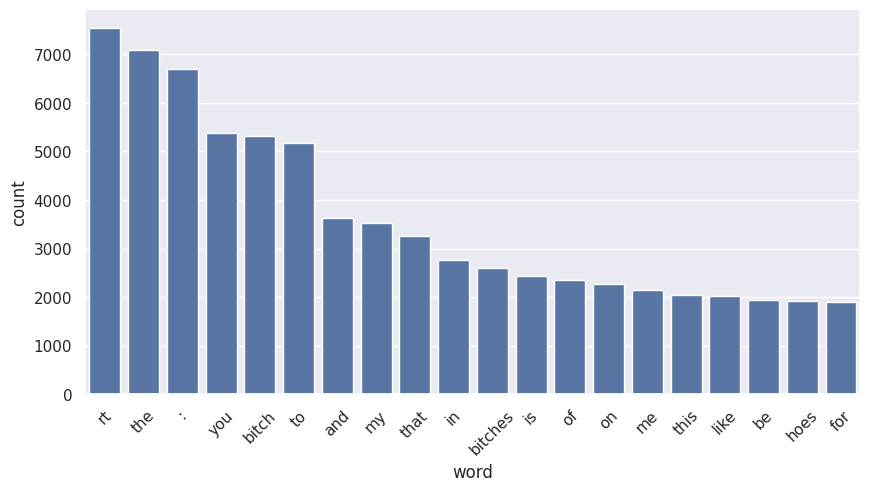

In [ ]:
# find the most common words in the dataset

from collections import Counter

words = data['tweet'].apply(lambda x: [word for word in x.split()])

# most common words in the dataset (general)
words = [word for sublist in words for word in sublist]
word_count = Counter(words)
word_count.most_common(20)

# visualize the most common words
import matplotlib.pyplot as plt

word_count_df = pd.DataFrame(word_count.most_common(20), columns=['word', 'count'])

plt.figure(figsize=(10, 5))
sns.barplot(x='word', y='count', data=word_count_df)
plt.xticks(rotation=45)
plt.show()

The words 'a' and 'rt' and 'the' colon are most common and are not needed for our analysis. We will remove them

### Creating a cleaning data function

In [ ]:
# clean the data

stop_words = set(stopwords.words('english'))
# add some more stop words
stop_words.add('rt') # .......add rt to remove retweet in dataset (noise)



## remove special characters / html entities
def remove_special_char(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

## remove urls
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

## remove usernames and hashtags
def remove_usernames_hashtags(text):
    return re.sub(r'@\w+|#\w+', '', text)

## remove extra spaces
def remove_extra_spaces(text):
    return re.sub(r'\s+', ' ', text)


##  clean the text
def clean_text(text):
    text = text.lower()
    text = remove_special_char(text)
    text = remove_urls(text)
    text = remove_usernames_hashtags(text)
    text = remove_extra_spaces(text)
    return text

In [ ]:
# apply the cleaning function to the dataset

data['cleaned_tweet'] = data['tweet'].apply(clean_text)

data.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet,cleaned_tweet
0,3,0,0,3,2,!!! rt : aswoman you shouldn't complain about cleaning up your house. &amp; asman you should always take the trash out...,rt aswoman you shouldnt complain about cleaning up your house amp asman you should always take the trash out
1,3,0,3,0,1,!!!!! rt : boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,rt boy dats coldtyga dwn bad for cuffin dat hoe in the 1st place
2,3,0,3,0,1,!!!!!!! rt dawg!!!! rt : you ever fuckbitch and she start to cry? you be confused as shit,rt dawg rt you ever fuckbitch and she start to cry you be confused as shit
3,3,0,2,1,1,!!!!!!!!! rt : she look liketranny,rt she look liketranny
4,6,0,6,0,1,!!!!!!!!!!!!! rt : the shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,rt the shit you hear about me might be true or it might be faker than the bitch who told it to ya 57361


In [ ]:
# compared cleaned tweet with original tweet

data[['tweet', 'cleaned_tweet']].head(10)

,tweet,cleaned_tweet
0,!!! rt : aswoman you shouldn't complain about cleaning up your house. &amp; asman you should always take the trash out...,rt aswoman you shouldnt complain about cleaning up your house amp asman you should always take the trash out
1,!!!!! rt : boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,rt boy dats coldtyga dwn bad for cuffin dat hoe in the 1st place
2,!!!!!!! rt dawg!!!! rt : you ever fuckbitch and she start to cry? you be confused as shit,rt dawg rt you ever fuckbitch and she start to cry you be confused as shit
3,!!!!!!!!! rt : she look liketranny,rt she look liketranny
4,!!!!!!!!!!!!! rt : the shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,rt the shit you hear about me might be true or it might be faker than the bitch who told it to ya 57361
5,"!!!!!!!!!!!!!!!!!!"": the shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;""",the shit just blows meclaim you so faithful and down for somebody but still fucking with hoes 128514128514128514
6,"!!!!!!"":can not just sit up and hate on another bitch ..got too much shit going on!""",can not just sit up and hate on another bitch got too much shit going on
7,!!!!&#8220;: cause i'm tired of you big bitches coming for us skinny girls!!&#8221;,8220 cause im tired of you big bitches coming for us skinny girls8221
8,""" &amp; you might not get ya bitch back &amp; thats that """,amp you might not get ya bitch back amp thats that
9,""" :hobbies include: fighting mariam"" bitch",hobbies include fighting mariam bitch


In [ ]:
# remove stop words

def remove_stop_words(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

data['cleaned_tweet_two'] = data['cleaned_tweet'].apply(remove_stop_words)

data[['tweet', 'cleaned_tweet', 'cleaned_tweet_two']].head(10)

,tweet,cleaned_tweet,cleaned_tweet_two
0,!!! rt : aswoman you shouldn't complain about cleaning up your house. &amp; asman you should always take the trash out...,rt aswoman you shouldnt complain about cleaning up your house amp asman you should always take the trash out,aswoman shouldnt complain cleaning house amp asman always take trash
1,!!!!! rt : boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,rt boy dats coldtyga dwn bad for cuffin dat hoe in the 1st place,boy dats coldtyga dwn bad cuffin dat hoe 1st place
2,!!!!!!! rt dawg!!!! rt : you ever fuckbitch and she start to cry? you be confused as shit,rt dawg rt you ever fuckbitch and she start to cry you be confused as shit,dawg ever fuckbitch start cry confused shit
3,!!!!!!!!! rt : she look liketranny,rt she look liketranny,look liketranny
4,!!!!!!!!!!!!! rt : the shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,rt the shit you hear about me might be true or it might be faker than the bitch who told it to ya 57361,shit hear might true might faker bitch told ya 57361
5,"!!!!!!!!!!!!!!!!!!"": the shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;""",the shit just blows meclaim you so faithful and down for somebody but still fucking with hoes 128514128514128514,shit blows meclaim faithful somebody still fucking hoes 128514128514128514
6,"!!!!!!"":can not just sit up and hate on another bitch ..got too much shit going on!""",can not just sit up and hate on another bitch got too much shit going on,sit hate another bitch got much shit going
7,!!!!&#8220;: cause i'm tired of you big bitches coming for us skinny girls!!&#8221;,8220 cause im tired of you big bitches coming for us skinny girls8221,8220 cause im tired big bitches coming us skinny girls8221
8,""" &amp; you might not get ya bitch back &amp; thats that """,amp you might not get ya bitch back amp thats that,amp might get ya bitch back amp thats
9,""" :hobbies include: fighting mariam"" bitch",hobbies include fighting mariam bitch,hobbies include fighting mariam bitch


In [ ]:
# remove short words

def remove_short_words(text):
    return ' '.join([word for word in text.split() if len(word) > 2])

data['cleaned_tweet_three'] = data['cleaned_tweet_two'].apply(remove_short_words)

In [ ]:
data[['tweet', 'cleaned_tweet', 'cleaned_tweet_two', 'cleaned_tweet_three']].tail(10)

,tweet,cleaned_tweet,cleaned_tweet_two,cleaned_tweet_three
24773,you niggers cheat on ya gf's? smh....,you niggers cheat on ya gfs smh,niggers cheat ya gfs smh,niggers cheat gfs smh
24774,you really care bout dis bitch. my dick all in yo feelings,you really care bout dis bitch my dick all in yo feelings,really care bout dis bitch dick yo feelings,really care bout dis bitch dick feelings
24775,"you worried bout other bitches, you need me for?",you worried bout other bitches you need me for,worried bout bitches need,worried bout bitches need
24776,you're all niggers,youre all niggers,youre niggers,youre niggers
24777,you're suchretardhope you get type 2 diabetes and die fromsugar rush you fucking faggot,youre suchretardhope you get type 2 diabetes and die fromsugar rush you fucking faggot,youre suchretardhope get type 2 diabetes die fromsugar rush fucking faggot,youre suchretardhope get type diabetes die fromsugar rush fucking faggot
24778,"you'smuthaf***in lie &#8220;: right! his tl is trash &#8230;. now, mine? bible scriptures and hymns&#8221;",yousmuthafin lie 8220 right his tl is trash 8230 now mine bible scriptures and hymns8221,yousmuthafin lie 8220 right tl trash 8230 mine bible scriptures hymns8221,yousmuthafin lie 8220 right trash 8230 mine bible scriptures hymns8221
24779,"you've gone and broke the wrong heart baby, and drove me redneck crazy",youve gone and broke the wrong heart baby and drove me redneck crazy,youve gone broke wrong heart baby drove redneck crazy,youve gone broke wrong heart baby drove redneck crazy
24780,young buck wanna eat!!.. dat nigguh likeaint fuckin dis up again,young buck wanna eat dat nigguh likeaint fuckin dis up again,young buck wanna eat dat nigguh likeaint fuckin dis,young buck wanna eat dat nigguh likeaint fuckin dis
24781,youu got wild bitches tellin you lies,youu got wild bitches tellin you lies,youu got wild bitches tellin lies,youu got wild bitches tellin lies
24782,"~~ruffled | ntac eileen dahlia - beautiful color combination of pink, orange, yellow &amp; white.coll",ruffled ntac eileen dahlia beautiful color combination of pink orange yellow amp whitecoll,ruffled ntac eileen dahlia beautiful color combination pink orange yellow amp whitecoll,ruffled ntac eileen dahlia beautiful color combination pink orange yellow amp whitecoll


In [ ]:
data[['tweet', 'cleaned_tweet', 'cleaned_tweet_two', 'cleaned_tweet_three']].head(10)

,tweet,cleaned_tweet,cleaned_tweet_two,cleaned_tweet_three
0,!!! rt : aswoman you shouldn't complain about cleaning up your house. &amp; asman you should always take the trash out...,rt aswoman you shouldnt complain about cleaning up your house amp asman you should always take the trash out,aswoman shouldnt complain cleaning house amp asman always take trash,aswoman shouldnt complain cleaning house amp asman always take trash
1,!!!!! rt : boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,rt boy dats coldtyga dwn bad for cuffin dat hoe in the 1st place,boy dats coldtyga dwn bad cuffin dat hoe 1st place,boy dats coldtyga dwn bad cuffin dat hoe 1st place
2,!!!!!!! rt dawg!!!! rt : you ever fuckbitch and she start to cry? you be confused as shit,rt dawg rt you ever fuckbitch and she start to cry you be confused as shit,dawg ever fuckbitch start cry confused shit,dawg ever fuckbitch start cry confused shit
3,!!!!!!!!! rt : she look liketranny,rt she look liketranny,look liketranny,look liketranny
4,!!!!!!!!!!!!! rt : the shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,rt the shit you hear about me might be true or it might be faker than the bitch who told it to ya 57361,shit hear might true might faker bitch told ya 57361,shit hear might true might faker bitch told 57361
5,"!!!!!!!!!!!!!!!!!!"": the shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;""",the shit just blows meclaim you so faithful and down for somebody but still fucking with hoes 128514128514128514,shit blows meclaim faithful somebody still fucking hoes 128514128514128514,shit blows meclaim faithful somebody still fucking hoes 128514128514128514
6,"!!!!!!"":can not just sit up and hate on another bitch ..got too much shit going on!""",can not just sit up and hate on another bitch got too much shit going on,sit hate another bitch got much shit going,sit hate another bitch got much shit going
7,!!!!&#8220;: cause i'm tired of you big bitches coming for us skinny girls!!&#8221;,8220 cause im tired of you big bitches coming for us skinny girls8221,8220 cause im tired big bitches coming us skinny girls8221,8220 cause tired big bitches coming skinny girls8221
8,""" &amp; you might not get ya bitch back &amp; thats that """,amp you might not get ya bitch back amp thats that,amp might get ya bitch back amp thats,amp might get bitch back amp thats
9,""" :hobbies include: fighting mariam"" bitch",hobbies include fighting mariam bitch,hobbies include fighting mariam bitch,hobbies include fighting mariam bitch


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   count                     24783 non-null  int64 
 1   hate_speech_count         24783 non-null  int64 
 2   offensive_language_count  24783 non-null  int64 
 3   neither_count             24783 non-null  int64 
 4   class                     24783 non-null  int64 
 5   tweet                     24783 non-null  object
 6   cleaned_tweet             24783 non-null  object
 7   cleaned_tweet_two         24783 non-null  object
 8   cleaned_tweet_three       24783 non-null  object
dtypes: int64(5), object(4)
memory usage: 1.7+ MB


In [ ]:
data.isnull().sum()

count                       0
hate_speech_count           0
offensive_language_count    0
neither_count               0
class                       0
tweet                       0
cleaned_tweet               0
cleaned_tweet_two           0
cleaned_tweet_three         0
dtype: int64

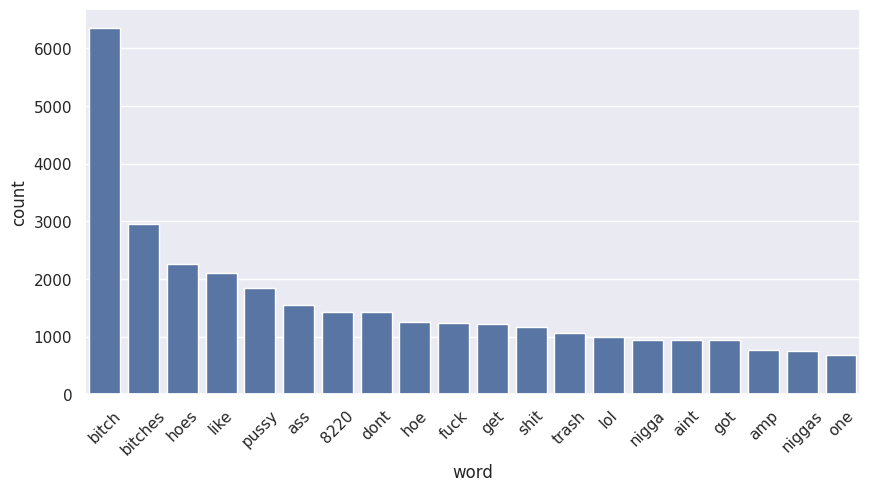

In [ ]:
# find the most common words in the dataset

from collections import Counter

words = data['cleaned_tweet_three'].apply(lambda x: [word for word in x.split()])

# most common words in the dataset (general)
words = [word for sublist in words for word in sublist]
word_count = Counter(words)
word_count.most_common(20)

# visualize the most common words
import matplotlib.pyplot as plt

word_count_df = pd.DataFrame(word_count.most_common(20), columns=['word', 'count'])

plt.figure(figsize=(10, 5))
sns.barplot(x='word', y='count', data=word_count_df)
plt.xticks(rotation=45)
plt.show()

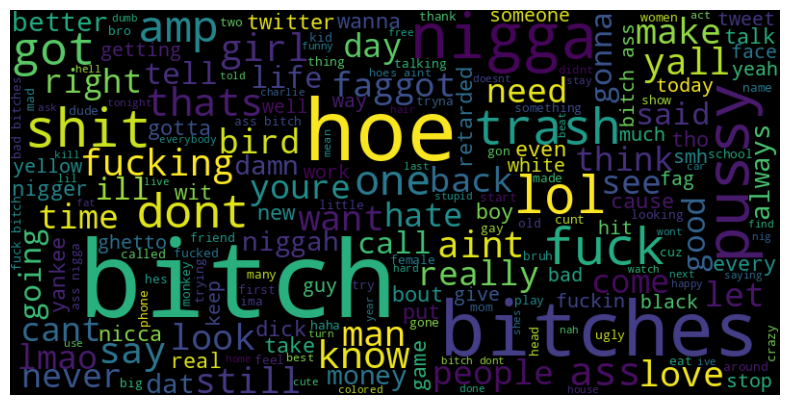

In [ ]:
# same with before, but using word cloud

from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(' '.join(words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

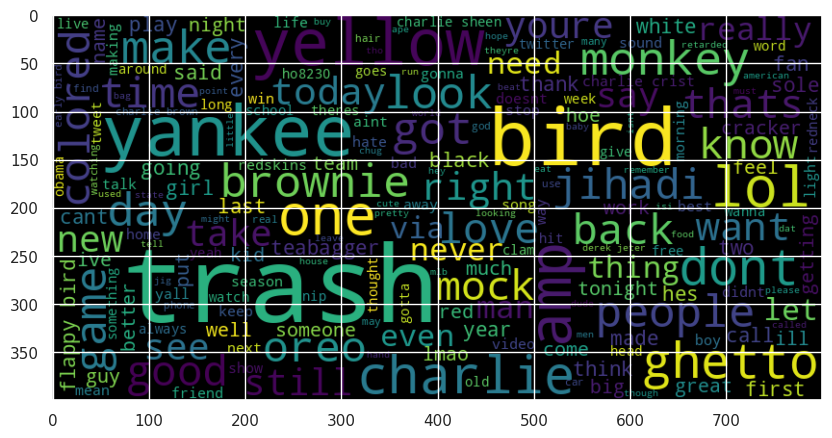

In [ ]:
# now im curios. how about the most common words for only the neutral class?
# im assumming that neutral class is number 2 in the class column from looking a bit of the dataset

neutral_tweets = data[data['class'] == 2]['cleaned_tweet_three']
neutral_words = neutral_tweets.apply(lambda x: [word for word in x.split()])

neutral_words = [word for sublist in neutral_words for word in sublist]
neutral_word_count = Counter(neutral_words)
neutral_word_count.most_common(20)

wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(' '.join(neutral_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')


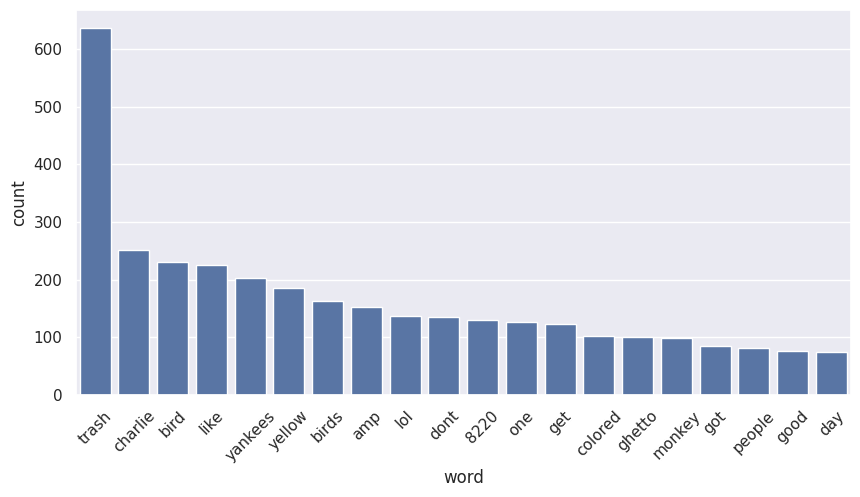

In [ ]:
# visualize the most common words in neutral tweets

neutral_word_count_df = pd.DataFrame(neutral_word_count.most_common(20), columns=['word', 'count'])

plt.figure(figsize=(10, 5))
sns.barplot(x='word', y='count', data=neutral_word_count_df)
plt.xticks(rotation=45)
plt.show()

well its quite unexpected, why does trash belong to neutral label? lets take a deeper look

In [ ]:
# show thow many tweet that include the word trash in it

data[data['cleaned_tweet_three'].str.contains('trash')]
data[data['cleaned_tweet_three'].str.contains('trash')]['class'].value_counts()

class
2    681
1    346
0    109
Name: count, dtype: int64

In [ ]:
# show five random  full tweets that include the word trash in it

pd.set_option('display.max_colwidth', None)
full_tweets_with_word_trash = data[data['cleaned_tweet_three'].str.contains('trash')]['cleaned_tweet_three'].sample(5)
print(full_tweets_with_word_trash)

3184     jus wanted let y225ll know hope hurricane kills soca sunday trash lordwillin
16626        skin diamond really last champion ebony porn everything else kinda trash
22638                                                                whatstrash party
2182         running around town delivering food people takes trash perfect boyfriend
6014                job prez protect throw trashebola cost daniel money amp lives dog
Name: cleaned_tweet_three, dtype: object


after taking a quick look. there goes the exploratory data analysis.. i believed its kinda bias to the neutral class having a trash word on it, but i think its okay for now.

# Feature Engineering

### Tokenization of data

####  Tokenizing -> basically we use tokenisation for many things, its commonly used for feature extraction in preprocessing. .... declare the tokenizer ... build the vocabulary based on train dataset .. tokenize the train and test dataset

In [ ]:
import textblob
from textblob import TextBlob

def tokenization(text):
    text = re.split('\W+', text)
    return text

data['Text_tokenized'] = data['cleaned_tweet_three'].apply(lambda x: tokenization(x.lower()))
data.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet,cleaned_tweet,cleaned_tweet_two,cleaned_tweet_three,Text_tokenized
0,3,0,0,3,2,!!! rt : aswoman you shouldn't complain about cleaning up your house. &amp; asman you should always take the trash out...,rt aswoman you shouldnt complain about cleaning up your house amp asman you should always take the trash out,aswoman shouldnt complain cleaning house amp asman always take trash,aswoman shouldnt complain cleaning house amp asman always take trash,"[aswoman, shouldnt, complain, cleaning, house, amp, asman, always, take, trash]"
1,3,0,3,0,1,!!!!! rt : boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,rt boy dats coldtyga dwn bad for cuffin dat hoe in the 1st place,boy dats coldtyga dwn bad cuffin dat hoe 1st place,boy dats coldtyga dwn bad cuffin dat hoe 1st place,"[boy, dats, coldtyga, dwn, bad, cuffin, dat, hoe, 1st, place]"
2,3,0,3,0,1,!!!!!!! rt dawg!!!! rt : you ever fuckbitch and she start to cry? you be confused as shit,rt dawg rt you ever fuckbitch and she start to cry you be confused as shit,dawg ever fuckbitch start cry confused shit,dawg ever fuckbitch start cry confused shit,"[dawg, ever, fuckbitch, start, cry, confused, shit]"
3,3,0,2,1,1,!!!!!!!!! rt : she look liketranny,rt she look liketranny,look liketranny,look liketranny,"[look, liketranny]"
4,6,0,6,0,1,!!!!!!!!!!!!! rt : the shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,rt the shit you hear about me might be true or it might be faker than the bitch who told it to ya 57361,shit hear might true might faker bitch told ya 57361,shit hear might true might faker bitch told 57361,"[shit, hear, might, true, might, faker, bitch, told, 57361]"


### Lemmitization of Data

In [ ]:
! python3 -m nltk.downloader wordnet
#! unzip /root/nltk_data/corpora/wordnet.zip -d /root/nltk_data/corpora/
#!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer
wordNet = WordNetLemmatizer()
def lemmatizer(text):
    text = [wordNet.lemmatize(word) for word in text]
    return text

data['Text_lemmatized'] = data['Text_tokenized'].apply(lambda x: lemmatizer(x))
data.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,count,hate_speech_count,offensive_language_count,neither_count,class,tweet,cleaned_tweet,cleaned_tweet_two,cleaned_tweet_three,Text_tokenized,Text_lemmatized
0,3,0,0,3,2,!!! rt : aswoman you shouldn't complain about cleaning up your house. &amp; asman you should always take the trash out...,rt aswoman you shouldnt complain about cleaning up your house amp asman you should always take the trash out,aswoman shouldnt complain cleaning house amp asman always take trash,aswoman shouldnt complain cleaning house amp asman always take trash,"[aswoman, shouldnt, complain, cleaning, house, amp, asman, always, take, trash]","[aswoman, shouldnt, complain, cleaning, house, amp, asman, always, take, trash]"
1,3,0,3,0,1,!!!!! rt : boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,rt boy dats coldtyga dwn bad for cuffin dat hoe in the 1st place,boy dats coldtyga dwn bad cuffin dat hoe 1st place,boy dats coldtyga dwn bad cuffin dat hoe 1st place,"[boy, dats, coldtyga, dwn, bad, cuffin, dat, hoe, 1st, place]","[boy, dat, coldtyga, dwn, bad, cuffin, dat, hoe, 1st, place]"
2,3,0,3,0,1,!!!!!!! rt dawg!!!! rt : you ever fuckbitch and she start to cry? you be confused as shit,rt dawg rt you ever fuckbitch and she start to cry you be confused as shit,dawg ever fuckbitch start cry confused shit,dawg ever fuckbitch start cry confused shit,"[dawg, ever, fuckbitch, start, cry, confused, shit]","[dawg, ever, fuckbitch, start, cry, confused, shit]"
3,3,0,2,1,1,!!!!!!!!! rt : she look liketranny,rt she look liketranny,look liketranny,look liketranny,"[look, liketranny]","[look, liketranny]"
4,6,0,6,0,1,!!!!!!!!!!!!! rt : the shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,rt the shit you hear about me might be true or it might be faker than the bitch who told it to ya 57361,shit hear might true might faker bitch told ya 57361,shit hear might true might faker bitch told 57361,"[shit, hear, might, true, might, faker, bitch, told, 57361]","[shit, hear, might, true, might, faker, bitch, told, 57361]"


# Data Modeling

In [ ]:
X = data["cleaned_tweet_three"]
y = data["class"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20)

### Performing TF-IDF Conversion

In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit((X_train).values.astype('U'))
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  129192


In [ ]:
X_train = vectoriser.transform((X_train).values.astype('U'))
X_test  = vectoriser.transform((X_test).values.astype('U'))

In [ ]:
# see the shape of the vectorized data

X_train.shape, X_test.shape

((19826, 129192), (4957, 129192))

In [ ]:
print(f"num test tweet: {y_test.shape[0]}")
print(f"num train tweet: {y_train.shape[0]}")

num test tweet: 4957
num train tweet: 19826


### Model Evaluation

In [ ]:
def model_evaluate(model,X_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cf_matrix = confusion_matrix(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    cm_df = pd.DataFrame(cm,
                     index = ['hate speech','offensive language','Neutral'],
                     columns = ['hate speech','offensive language','Neutral'])

    #Plotting the confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, annot=True, cmap="Oranges",linecolor="gray")
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()

### Logistic Regression Model

In [ ]:
lr_model = LogisticRegression(C = 1, max_iter = 1000, penalty = 'l2', n_jobs=-1)
lr_model.fit(X_train  ,y_train)

LogisticRegression(C=1, max_iter=1000, n_jobs=-1)

              precision    recall  f1-score   support

           0       0.64      0.16      0.26       285
           1       0.88      0.97      0.92      3819
           2       0.85      0.67      0.75       853

    accuracy                           0.87      4957
   macro avg       0.79      0.60      0.64      4957
weighted avg       0.86      0.87      0.86      4957



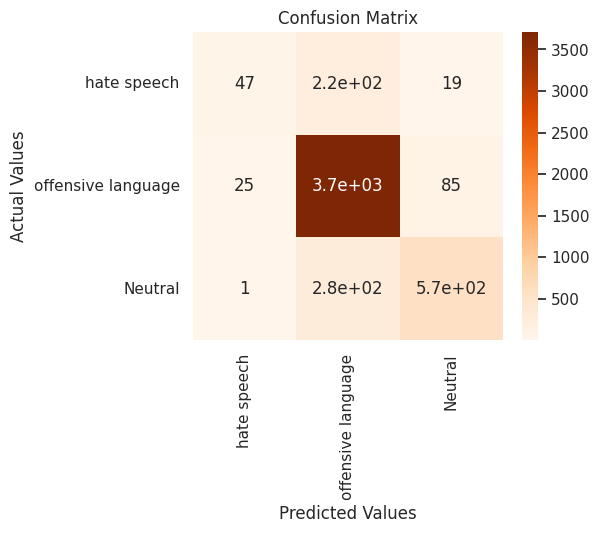

In [ ]:
model_evaluate(lr_model ,X_test)

### Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtmodel = DecisionTreeClassifier()
dtc = dtmodel.fit(X_train,y_train)

              precision    recall  f1-score   support

           0       0.37      0.28      0.32       285
           1       0.92      0.90      0.91      3819
           2       0.72      0.83      0.77       853

    accuracy                           0.86      4957
   macro avg       0.67      0.67      0.67      4957
weighted avg       0.85      0.86      0.85      4957



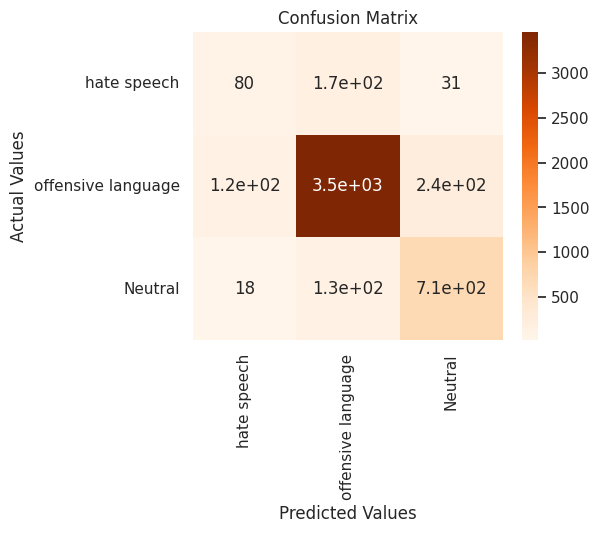

In [ ]:
model_evaluate(dtc ,X_test)

### K-Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train  ,y_train)

KNeighborsClassifier(n_neighbors=3)

              precision    recall  f1-score   support

           0       0.23      0.39      0.29       285
           1       0.90      0.80      0.85      3819
           2       0.54      0.67      0.60       853

    accuracy                           0.76      4957
   macro avg       0.55      0.62      0.58      4957
weighted avg       0.80      0.76      0.77      4957



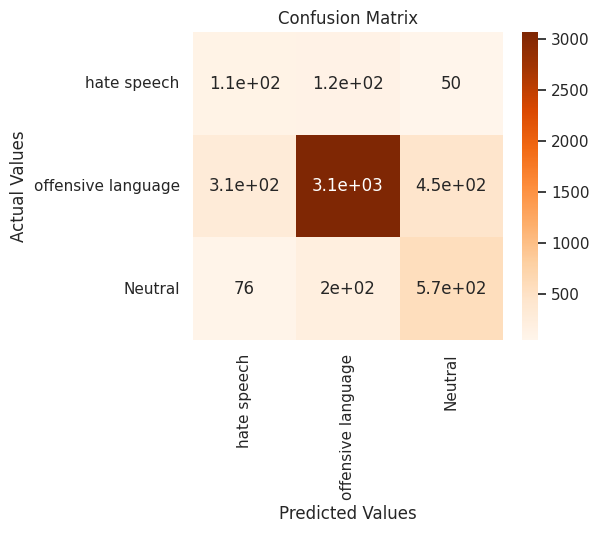

In [ ]:
model_evaluate(neigh ,X_test)

### Random Forest Classifier

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rfc=RandomForestClassifier(n_estimators=10)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

              precision    recall  f1-score   support

           0       0.47      0.17      0.25       285
           1       0.89      0.94      0.92      3819
           2       0.77      0.74      0.75       853

    accuracy                           0.86      4957
   macro avg       0.71      0.62      0.64      4957
weighted avg       0.85      0.86      0.85      4957



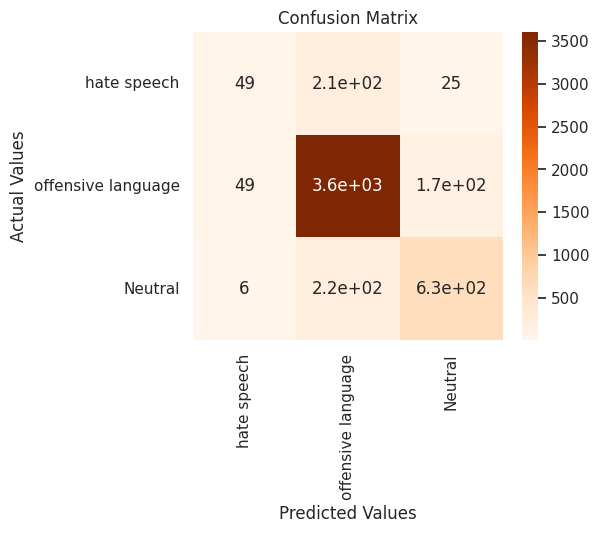

In [ ]:
model_evaluate(rfc ,X_test)

In [ ]:
#Import XGB FModel
import xgboost as xgb

#Create a XGB Classifier
xgb_model=xgb.XGBClassifier(objective="multi:softprob")

#Train the model using the training sets
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

              precision    recall  f1-score   support

           0       0.55      0.22      0.31       285
           1       0.88      0.97      0.92      3819
           2       0.86      0.66      0.75       853

    accuracy                           0.87      4957
   macro avg       0.77      0.61      0.66      4957
weighted avg       0.86      0.87      0.86      4957



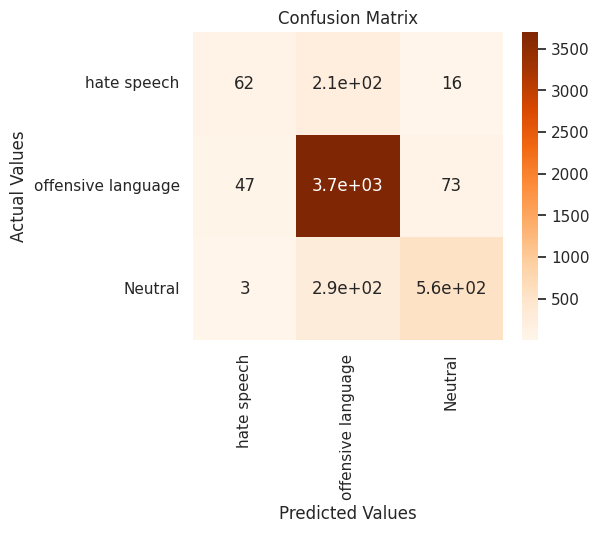

In [ ]:
model_evaluate(xgb_model,X_test)

### LGBM Classifier

In [ ]:
import lightgbm as lgb
lgb = lgb.LGBMClassifier()
lgb.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.177560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 27395
[LightGBM] [Info] Number of data points in the train set: 19826, number of used features: 1036
[LightGBM] [Info] Start training from score -2.851590
[LightGBM] [Info] Start training from score -0.254512
[LightGBM] [Info] Start training from score -1.790046


LGBMClassifier()

              precision    recall  f1-score   support

           0       0.49      0.25      0.33       285
           1       0.88      0.96      0.92      3819
           2       0.83      0.65      0.73       853

    accuracy                           0.87      4957
   macro avg       0.74      0.62      0.66      4957
weighted avg       0.85      0.87      0.85      4957



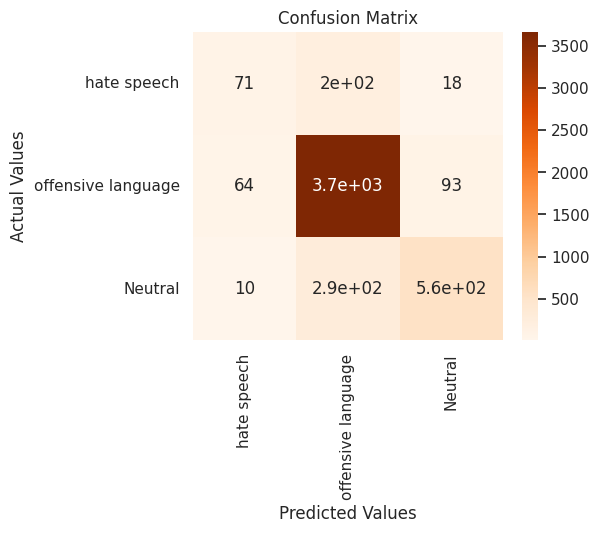

In [ ]:
model_evaluate(lgb,X_test)

##### The Logistic Regression,XGB Classifier and LGBM Classifer perform better than the other models. We will select the LGBM Model and perform Hyperparameter to try to improve the metrics for our model

## Hyperparameter Tuning

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV

# Define the LightGBM model
model = lgb.LGBMClassifier()

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                   n_iter=8, scoring='accuracy', cv=3, random_state=42)

In [ ]:
# Fit the model
random_search.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(), n_iter=8,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200]},
                   random_state=42, scoring='accuracy')

In [ ]:
# Print the best parameters and the best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}
Best Score: 0.8593767917547317


In [ ]:
# Evaluate the model with best parameters on the test set
best_model = random_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test Score:", test_score)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Test Score: 0.8656445430704055


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
              precision    recall  f1-score   support

           0       0.54      0.26      0.35       285
           1       0.88      0.97      0.92      3819
           2       0.86      0.62      0.72       853

    accuracy                           0.87      4957
   macro avg       0.76      0.61      0.66      4957
weighted avg       0.85      0.87      0.85      4957



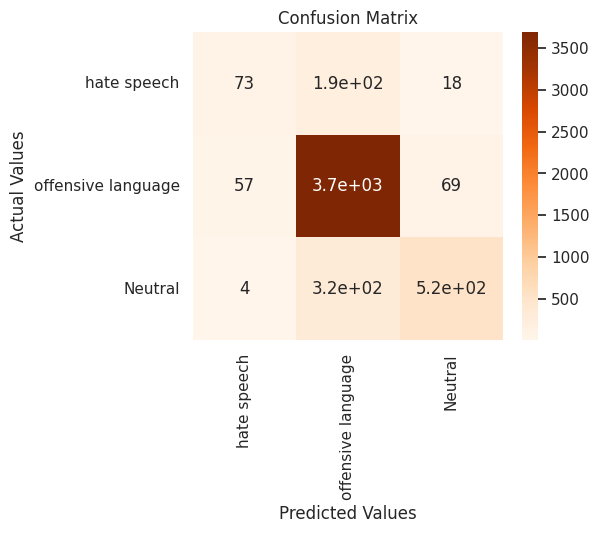

In [ ]:
model_evaluate(best_model,X_test)

### Test the model with a hate speech tweet / a offensive speech tweet / Neutral... based on the result that 0 is hate speech, 1 is offensive language and 2 is neutral

In [ ]:
test_tweet = ['I hate you']

tweet_tfidf = vectoriser.transform(test_tweet)
lr_model.predict(tweet_tfidf)

array([0])

In [ ]:
test_tweet = ['You are so stupid']

tweet_tfidf = vectoriser.transform(test_tweet)
lr_model.predict(tweet_tfidf)

array([0])

In [ ]:
test_tweet = ['I am learning data science very well']

tweet_tfidf = vectoriser.transform(test_tweet)
lr_model.predict(tweet_tfidf)

array([1])

# 2nd Method Data Processing

In [ ]:
#Required Libraries

import subprocess

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import namedtuple
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.sequence import pad_sequences

try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')

[nltk_data] Downloading package wordnet to /kaggle/working/...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df = (df
    .drop(columns=["count", "hate_speech_count", "offensive_language_count", "neither_count"])
)


In [ ]:
class_map = {
    0: "hate speech",
    1: "offensive speech",
    2: "neutral speech"
}

In [ ]:
# Text cleaning Function

def remove_urls(text, replacement_text=""):
    """Remove URLs from string."""
    pattern = re.compile(r"https?://\S+|www\.\S+")
    return pattern.sub(replacement_text, text)


def remove_twitter_handles(text, replacement_text=""):
    """Remove twitter handles from string."""
    pattern = re.compile(r"@[\w]+")
    return pattern.sub(replacement_text, text)


def remove_twitter_rt(text, replacement_text=""):
    """Remove twitter RTs from string."""
    pattern = re.compile(r"^RT|\s+RT\s+")
    return pattern.sub(replacement_text, text)


def remove_alphanumerics(text, replacement_text=" "):
    """Remove alphanumerics from string but leave single quote be."""
    pattern = re.compile(r"[^A-Za-z0-9']+")
    return pattern.sub(replacement_text, text)


def remove_multiple_whitespaces(text, replacement_text=" "):
    """Remove multiple whitespaces from string."""
    pattern = re.compile(r"\s{2,}")
    return pattern.sub(replacement_text, text)


def decode_html_character_references(text):
    """Decode HTML chacarters in string, e.g. &#38; and &amp;."""
    import html
    return html.unescape(text)


df = (df
    .assign(
        tweet_clean=lambda df_: (df_["tweet"]
            .apply(decode_html_character_references)
            .apply(remove_twitter_handles)
            .apply(remove_twitter_rt)
            .apply(remove_urls)
            .apply(remove_alphanumerics)
            .apply(remove_multiple_whitespaces)
            .str.strip()
        )
    )
)

df.tail()

,class,tweet,cleaned_tweet,cleaned_tweet_two,cleaned_tweet_three,Text_tokenized,Text_lemmatized,tweet_clean
24778,1,"you'smuthaf***in lie &#8220;: right! his tl is trash &#8230;. now, mine? bible scriptures and hymns&#8221;",yousmuthafin lie 8220 right his tl is trash 8230 now mine bible scriptures and hymns8221,yousmuthafin lie 8220 right tl trash 8230 mine bible scriptures hymns8221,yousmuthafin lie 8220 right trash 8230 mine bible scriptures hymns8221,"[yousmuthafin, lie, 8220, right, trash, 8230, mine, bible, scriptures, hymns8221]","[yousmuthafin, lie, 8220, right, trash, 8230, mine, bible, scripture, hymns8221]",you'smuthaf in lie right his tl is trash now mine bible scriptures and hymns
24779,2,"you've gone and broke the wrong heart baby, and drove me redneck crazy",youve gone and broke the wrong heart baby and drove me redneck crazy,youve gone broke wrong heart baby drove redneck crazy,youve gone broke wrong heart baby drove redneck crazy,"[youve, gone, broke, wrong, heart, baby, drove, redneck, crazy]","[youve, gone, broke, wrong, heart, baby, drove, redneck, crazy]",you've gone and broke the wrong heart baby and drove me redneck crazy
24780,1,young buck wanna eat!!.. dat nigguh likeaint fuckin dis up again,young buck wanna eat dat nigguh likeaint fuckin dis up again,young buck wanna eat dat nigguh likeaint fuckin dis,young buck wanna eat dat nigguh likeaint fuckin dis,"[young, buck, wanna, eat, dat, nigguh, likeaint, fuckin, dis]","[young, buck, wanna, eat, dat, nigguh, likeaint, fuckin, dis]",young buck wanna eat dat nigguh likeaint fuckin dis up again
24781,1,youu got wild bitches tellin you lies,youu got wild bitches tellin you lies,youu got wild bitches tellin lies,youu got wild bitches tellin lies,"[youu, got, wild, bitches, tellin, lies]","[youu, got, wild, bitch, tellin, lie]",youu got wild bitches tellin you lies
24782,2,"~~ruffled | ntac eileen dahlia - beautiful color combination of pink, orange, yellow &amp; white.coll",ruffled ntac eileen dahlia beautiful color combination of pink orange yellow amp whitecoll,ruffled ntac eileen dahlia beautiful color combination pink orange yellow amp whitecoll,ruffled ntac eileen dahlia beautiful color combination pink orange yellow amp whitecoll,"[ruffled, ntac, eileen, dahlia, beautiful, color, combination, pink, orange, yellow, amp, whitecoll]","[ruffled, ntac, eileen, dahlia, beautiful, color, combination, pink, orange, yellow, amp, whitecoll]",ruffled ntac eileen dahlia beautiful color combination of pink orange yellow white coll


In [ ]:
# Text prosessing function

def tokenize(doc):
    return word_tokenize(doc)


def remove_stopwords(doc):
    stops = set(stopwords.words("english"))
    stops.add("rt")
    return [token for token in doc if token not in stops]


def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"ain\'t", "are not", phrase)
    phrase = re.sub(r"shan\'t", "shall not", phrase)
    phrase = re.sub(r"ma\'am", "maam", phrase)
    phrase = re.sub(r"y\'all", "you all", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

lemmatizer = WordNetLemmatizer()

df = (df
    .assign(
        tweet_preprocessed=lambda df_: (
            df_["tweet_clean"]
            .str.lower()
            .apply(lambda doc: [decontracted(word) for word in doc.split(" ")])
            .apply(lambda doc: [lemmatizer.lemmatize(word) for word in doc])
            .apply(lambda doc: " ".join(doc))
            .apply(word_tokenize)
            .apply(remove_stopwords)
       )
    )
)

df.sample(5)

,class,tweet,cleaned_tweet,cleaned_tweet_two,cleaned_tweet_three,Text_tokenized,Text_lemmatized,tweet_clean,tweet_preprocessed
10622,1,i know ifdon't move out by next year my mom gonna bitch at me the whole timelive with her,i know ifdont move out by next year my mom gonna bitch at me the whole timelive with her,know ifdont move next year mom gonna bitch whole timelive,know ifdont move next year mom gonna bitch whole timelive,"[know, ifdont, move, next, year, mom, gonna, bitch, whole, timelive]","[know, ifdont, move, next, year, mom, gonna, bitch, whole, timelive]",i know ifdon't move out by next year my mom gonna bitch at me the whole timelive with her,"[know, ifdo, move, next, year, mom, gon, na, bitch, whole, timelive]"
24599,1,tom ford probably fucking all these hoes,tom ford probably fucking all these hoes,tom ford probably fucking hoes,tom ford probably fucking hoes,"[tom, ford, probably, fucking, hoes]","[tom, ford, probably, fucking, hoe]",tom ford probably fucking all these hoes,"[tom, ford, probably, fucking, hoe]"
24191,0,looking likehillbilly and not matching is whatdo best goodnight losers,looking likehillbilly and not matching is whatdo best goodnight losers,looking likehillbilly matching whatdo best goodnight losers,looking likehillbilly matching whatdo best goodnight losers,"[looking, likehillbilly, matching, whatdo, best, goodnight, losers]","[looking, likehillbilly, matching, whatdo, best, goodnight, loser]",looking likehillbilly and not matching is whatdo best goodnight losers,"[looking, likehillbilly, matching, whatdo, best, goodnight, loser]"
19008,2,rt : why tori amos matters now more than ever via,rt why tori amos matters now more than ever via,tori amos matters ever via,tori amos matters ever via,"[tori, amos, matters, ever, via]","[torus, amos, matter, ever, via]",rt why tori amos matters now more than ever via,"[torus, amos, matter, ever, via]"
19505,2,rt : i've only watched 10mins of this trash andfeel likejust wasted some valuable minutes of my life thatcan never get b&#8230;,rt ive only watched 10mins of this trash andfeel likejust wasted some valuable minutes of my life thatcan never get b8230,ive watched 10mins trash andfeel likejust wasted valuable minutes life thatcan never get b8230,ive watched 10mins trash andfeel likejust wasted valuable minutes life thatcan never get b8230,"[ive, watched, 10mins, trash, andfeel, likejust, wasted, valuable, minutes, life, thatcan, never, get, b8230]","[ive, watched, 10mins, trash, andfeel, likejust, wasted, valuable, minute, life, thatcan, never, get, b8230]",rt i've only watched 10mins of this trash andfeel likejust wasted some valuable minutes of my life thatcan never get b,"[watched, 10mins, trash, andfeel, likejust, wasted, valuable, minute, life, thatcan, never, get, b]"


### 2nd Method Modelling

#### Train Test Split

In [ ]:
y = df["class"].values
x = df["tweet_preprocessed"].values
x = [(" ").join(doc) for  doc in x]

x = np.asarray(x)
y = np.asarray(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.1, random_state=8)

print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

22304 22304
2479 2479


### Traditional Machine Learning: Feature Engineering, Training, and Testing

In [ ]:
def return_score(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average="weighted")
    precision = precision_score(y_true, y_pred, average="weighted", zero_division=0.0)
    recall = recall_score(y_true, y_pred, average="weighted")
    matrix = confusion_matrix(y_true, y_pred, normalize="true")
    Scores = namedtuple("Scores", ["acc", "f1", "precision", "recall", "matrix"])
    return Scores(acc, f1, precision, recall, matrix)

We will iterate through the defined models with StrafitiedKFold to check what are the best performing algorithm.**

In [ ]:
dummy = DummyClassifier()
logistic = LogisticRegression(max_iter=1_000, random_state=8)
svc = LinearSVC(max_iter=1_000, random_state=8)
sgd = SGDClassifier()
knn = KNeighborsClassifier()
bayes = MultinomialNB()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
xgb = XGBClassifier()


models = [
    dummy,
    logistic,
    sgd,
    dt,
    rf,
    xgb,
]

for model in models:
    model_name = model.__class__.__name__
    model_scores = []

    print(model_name)
    skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=8)
    for i, (train_index, val_index) in enumerate(skf.split(x_train, y_train)):

        print(f"\tFold {i}")

        # create train and val subset
        x_train_count = x_train[train_index]
        y_train_count = y_train[train_index]
        x_val_count = x_train[val_index]
        y_val_count = y_train[val_index]

        # oversample minority class in train set to deal with class imbalance
        # not oversample the val set to keep it untouched
        ros = RandomOverSampler(random_state=42)
        x_train_count, y_train_count = ros.fit_resample(x_train_count.reshape(-1, 1), y_train_count)
        x_train_count = x_train_count.flatten()

        if model_name != "DummyClassifier":
            # vectorize
            vectorizer = CountVectorizer()
            vectorizer.fit(x_train_count)
            x_train_count = vectorizer.transform(x_train_count)
            x_val_count = vectorizer.transform(x_val_count)

        # fit and predict
        model.fit(x_train_count, y_train_count)
        y_pred = model.predict(x_val_count)
        scores_this_fold = return_score(y_val_count, y_pred)
        model_scores.append(scores_this_fold)

    # print scores
    mean_acc = np.asarray([score.acc for score in model_scores]).mean()
    mean_f1 = np.asarray([score.f1 for score in model_scores]).mean()
    mean_precision = np.asarray([score.precision for score in model_scores]).mean()
    mean_recall = np.asarray([score.recall for score in model_scores]).mean()
    print(f"\tAcc: {mean_acc: .5f} | F1: {mean_f1: .5f} | Precision : {mean_precision: .5f} | Recall: {mean_recall: .5f}")

DummyClassifier
	Fold 0
	Fold 1
	Fold 2
	Fold 3
	Acc:  0.05770 | F1:  0.00630 | Precision :  0.00333 | Recall:  0.05770
LogisticRegression
	Fold 0
	Fold 1
	Fold 2
	Fold 3
	Acc:  0.85940 | F1:  0.86669 | Precision :  0.87753 | Recall:  0.85940
SGDClassifier
	Fold 0
	Fold 1
	Fold 2
	Fold 3
	Acc:  0.85850 | F1:  0.86634 | Precision :  0.87770 | Recall:  0.85850
DecisionTreeClassifier
	Fold 0
	Fold 1
	Fold 2
	Fold 3
	Acc:  0.83402 | F1:  0.84368 | Precision :  0.85843 | Recall:  0.83402
RandomForestClassifier
	Fold 0
	Fold 1
	Fold 2
	Fold 3
	Acc:  0.86926 | F1:  0.86955 | Precision :  0.87102 | Recall:  0.86926
XGBClassifier
	Fold 0
	Fold 1
	Fold 2
	Fold 3
	Acc:  0.80434 | F1:  0.82214 | Precision :  0.87205 | Recall:  0.80434


As expected, XGBoost is our best model. Time to test out best model.

In [ ]:
xgb = XGBClassifier()
vectorizer = CountVectorizer()
ros = RandomOverSampler(random_state=42)

# resample
x_train_res, y_train_res = ros.fit_resample(x_train.reshape(-1, 1), y_train)
x_train_res = x_train_res.flatten()

# vectorize
vectorizer.fit(x_train_res)
x_train_vectorized = vectorizer.transform(x_train_res)
x_test_vectorized = vectorizer.transform(x_test)

# fit and predict
xgb.fit(x_train_vectorized, y_train_res)
y_pred = xgb.predict(x_test_vectorized)
scores = return_score(y_test, y_pred)

print(f"Acc: {scores.acc: .5f} | F1: {scores.f1: .5f} | Precision : {scores.precision: .5f} | Recall: {scores.recall: .5f}")


Acc:  0.79064 | F1:  0.80956 | Precision :  0.86111 | Recall:  0.79064


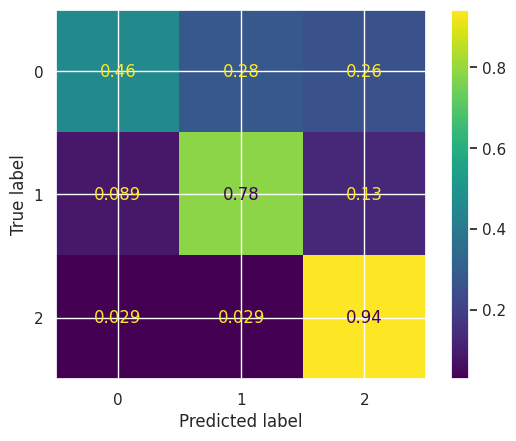

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize="true")
plt.show()

## Deep Learning with LSTM: Feature Engineering, Training, and Testing

#### Now we will see if we can achieve better result using LSTM.

Split out train and val first because previously we do not have it.

In [ ]:
x_train_nn, x_val_nn, y_train_nn, y_val_nn = train_test_split(
    x_train, y_train, test_size=0.1, stratify=y_train, random_state=8
)
x_test_nn = x_test.copy()
y_test_nn = y_test.copy()

print(x_train_nn.shape, y_train_nn.shape)
print(x_val_nn.shape, y_val_nn.shape)
print(x_test_nn.shape, y_test_nn.shape)

(20073,) (20073,)
(2231,) (2231,)
(2479,) (2479,)


In [ ]:
# Build word index
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train_nn)

word_index = tokenizer.word_index
vocab_size = len(word_index)
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 23879


In [ ]:
# Then, map each word to their respective word index.

x_train_nn = tokenizer.texts_to_sequences(x_train_nn)
x_val_nn = tokenizer.texts_to_sequences(x_val_nn)
x_test_nn = tokenizer.texts_to_sequences(x_test_nn)

In [ ]:
print(x_train_nn[:3])

[[126, 8383, 2942, 8384, 1, 16], [15, 191, 1589, 2553, 2], [161, 455, 1, 456]]


In [ ]:
# Now, our docs in corpus have variative length.

min(len(doc) for doc in x_train_nn), max(len(doc) for doc in x_train_nn)

(0, 27)

In [ ]:
# We will pad them so they become of the same length.

max_seq_length = 30
x_train_nn = pad_sequences(
    x_train_nn, maxlen=max_seq_length, padding="post", truncating="post"
)
x_val_nn = pad_sequences(
    x_val_nn, maxlen=max_seq_length, padding="post", truncating="post"
)
x_test_nn = pad_sequences(
    x_test_nn, maxlen=max_seq_length, padding="post", truncating="post"
)

min(len(doc) for doc in x_train_nn), max(len(doc) for doc in x_train_nn)

(30, 30)

In [ ]:
# Next, encode the target into categorical.

from tensorflow.keras.utils import to_categorical

print(f"Before: {y_train_nn[:5]}")

y_train_nn = to_categorical(y_train_nn)
y_val_nn = to_categorical(y_val_nn)
y_test_nn = to_categorical(y_test_nn)

print(f"After: {y_train_nn[:5]}")

Before: [1 2 1 1 1]
After: [[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 64))
model.add(Bidirectional(LSTM(32, dropout=0.3, recurrent_dropout=0.3)))
model.add(Dense(16, activation="relu"))
model.add(Dense(3, activation="softmax")) # for 3 classes

model.compile(
    loss="categorical_crossentropy",
    optimizer=RMSprop(learning_rate=0.0001),
    metrics=["acc"]
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          1528256   
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                24832     
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dense_3 (Dense)             (None, 3)                 51        
                                                                 
Total params: 1554179 (5.93 MB)
Trainable params: 1554179 (5.93 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/50
157/157 [==============================] - 45s 242ms/step - loss: 0.9824 - acc: 0.7324 - val_loss: 0.7937 - val_acc: 0.7741
Epoch 2/50
157/157 [==============================] - 34s 216ms/step - loss: 0.6990 - acc: 0.7743 - val_loss: 0.6622 - val_acc: 0.7741
Epoch 3/50
157/157 [==============================] - 34s 220ms/step - loss: 0.6569 - acc: 0.7743 - val_loss: 0.6533 - val_acc: 0.7741
Epoch 4/50
157/157 [==============================] - 34s 215ms/step - loss: 0.6491 - acc: 0.7743 - val_loss: 0.6446 - val_acc: 0.7741
Epoch 5/50
157/157 [==============================] - 33s 213ms/step - loss: 0.6365 - acc: 0.7743 - val_loss: 0.6259 - val_acc: 0.7741
Epoch 6/50
157/157 [==============================] - 35s 221ms/step - loss: 0.6152 - acc: 0.7743 - val_loss: 0.5950 - val_acc: 0.7741
Epoch 7/50
157/157 [==============================] - 34s 219ms/step - loss: 0.5759 - acc: 0.7744 - val_loss: 0.5478 - val_acc: 0.7741
Epoch 8/50
157/157 [==============================] - 3

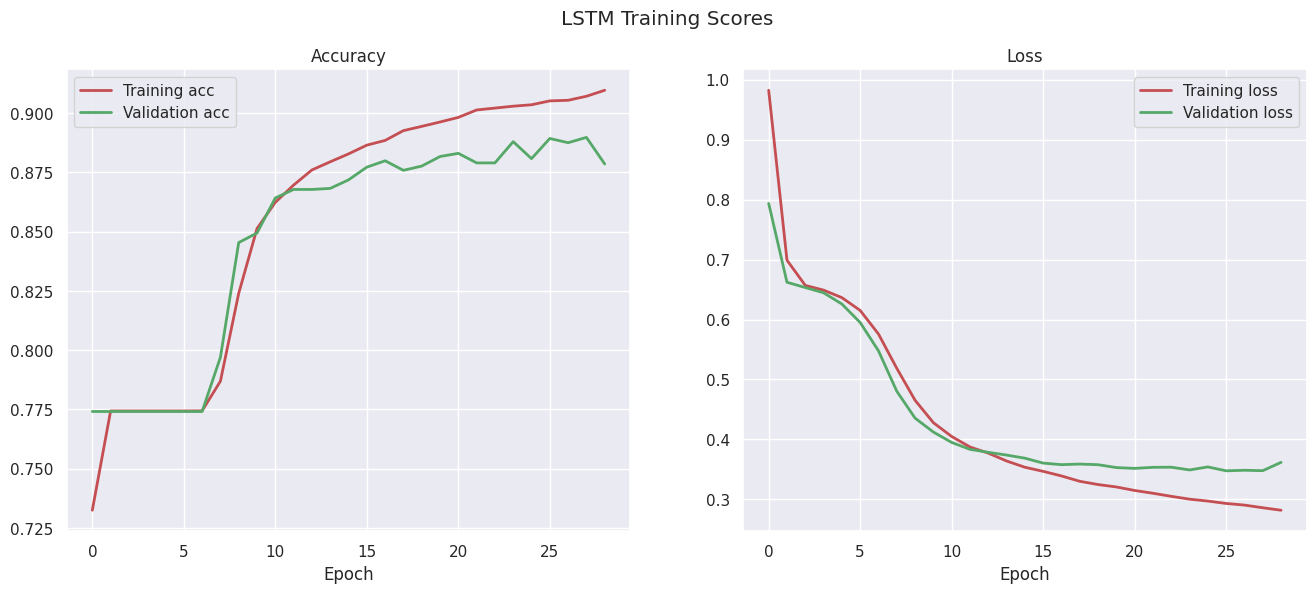

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(
    x_train_nn, y_train_nn,
    batch_size=128,
    epochs=50,
    validation_data=(x_val_nn, y_val_nn),
    callbacks=[early_stopping],
    verbose=1
)

hist = history.history

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.plot(hist['acc'],'r',linewidth=2, label='Training acc')
ax1.plot(hist['val_acc'], 'g',linewidth=2, label='Validation acc')
ax2.plot(hist['loss'],'r',linewidth=2, label='Training loss')
ax2.plot(hist['val_loss'], 'g',linewidth=2, label='Validation loss')

fig.suptitle('LSTM Training Scores')

ax1.set_title('Accuracy')
ax2.set_title('Loss')

ax1.set_xlabel('Epoch')
ax2.set_xlabel('Epoch')

ax1.legend()
ax2.legend()

plt.show()


In [ ]:
# Now test the model.

y_pred = model.predict(x_test_nn)

scores = return_score(
    np.argmax(y_test_nn, axis=1), np.argmax(y_pred, axis=1)
)
print(f"Acc: {scores.acc: .5f} | F1: {scores.f1: .5f} | Precision : {scores.precision: .5f} | Recall: {scores.recall: .5f}")


78/78 [==============================] - 2s 18ms/step
Acc:  0.87737 | F1:  0.84955 | Precision :  0.82513 | Recall:  0.87737


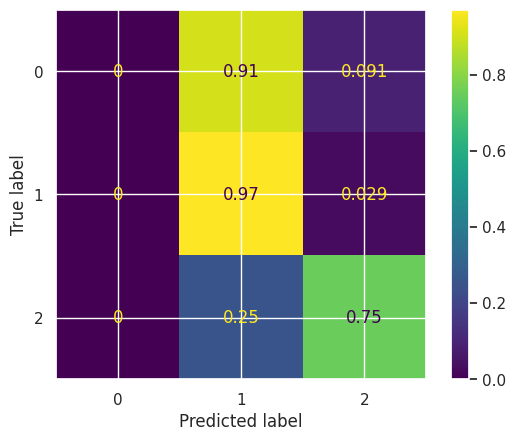

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(np.argmax(y_test_nn, axis=1), np.argmax(y_pred, axis=1), normalize="true")
plt.show()

## Demonstration

In [ ]:
# raw
# please apologize for the offensive language
# this does not represent my view in any way
test1 = "@CNN The weather forecast predicts sunshine and clear skies for tomorrow."
test2 = "I enjoy reading books and spending time in nature #selflove."
test3 = "Spending my weekends relaxing at home with a good movie with @sarah."
test4 = "I can't stand those immigrants ruining our country fuck them!!!"
test5 = "@melanie You damn broke bitch you should die LOL"

docs = [test1, test2, test3, test4, test5]
# tokenize
docs_processed = tokenizer.texts_to_sequences(docs)
# pad
docs_processed = pad_sequences(docs_processed, maxlen=max_seq_length, padding="post", truncating="post")
# predict
y_pred = np.argmax(model.predict(docs_processed), axis=1)

print("\nHate speech and offensive language detention algorithm.")
print("Model prediction:")
for doc, label in zip(docs, y_pred):
    print(f"{doc: <75} : predicted as {class_map.get(label)}")

1/1 [==============================] - 0s 51ms/step

Hate speech and offensive language detention algorithm.
Model prediction:
@CNN The weather forecast predicts sunshine and clear skies for tomorrow.   : predicted as offensive speech
I enjoy reading books and spending time in nature #selflove.                : predicted as offensive speech
Spending my weekends relaxing at home with a good movie with @sarah.        : predicted as neutral speech
I can't stand those immigrants ruining our country fuck them!!!             : predicted as offensive speech
@melanie You damn broke bitch you should die LOL                            : predicted as offensive speech


### Conclusion¶
In this notebook, we've looked into finding hateful and offensive language in Twitter posts. We used both basic machine learning and advanced deep learning techniques with LSTM networks. We started by setting up a simple model using a dummy classifier and then moved on to more complicated methods.

From our tests, we noticed that basic machine learning models sometimes struggle to understand the complicated language used in hate speech. But when we introduced LSTM networks, we saw a big improvement in how well the model worked. This shows that deep learning can be really effective in this area.